In [36]:
#importing necessary libraries
import pandas as pd
import sqlite3
import seaborn as sns
from tkinter import *
import matplotlib.pyplot as plt

#connecting to the csv file to create a dataframe
df= pd.read_csv(r"C:\Users\skhosanal\OneDrive - Inkomati-Usuthu Catchment Management Agency\Python Scripts\HeartDeseaseProject\heart.csv")

print("Dataframe created")

Dataframe created


In [2]:
pip install tk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyqt5

Note: you may need to restart the kernel to use updated packages.


In [37]:
#Establishing a connection to sqlite database
conn=sqlite3.connect('Heart.db')
print("Connection established")

Connection established


In [38]:
#converting the dataframe into a database in sqlite.
df.to_sql('Heart',conn,if_exists='replace')

print("dataframe converted into a Table Database")


dataframe converted into a Table Database


In [39]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [40]:
df.shape

(303, 14)

In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
data_dup=df.duplicated().any


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
data_dup

<bound method NDFrame._add_numeric_operations.<locals>.any of 0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool>

In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
df.shape

(303, 14)

In [48]:
#Fetching the data from sqlite Heart_Disease_Patients Database.
conn=sqlite3.connect('Heart.db')
cur=conn.cursor()
cur.execute("SELECT * FROM Heart")
rows = cur.fetchall()

for row in rows:
    print(row)

conn.commit()
conn.close()

(0, 63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1, 1)
(1, 37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2, 1)
(2, 41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 1)
(3, 56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1)
(4, 57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2, 1)
(5, 57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1, 1)
(6, 56, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2, 1)
(7, 44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3, 1)
(8, 52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3, 1)
(9, 57, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2, 1)
(10, 54, 1, 0, 140, 239, 0, 1, 160, 0, 1.2, 2, 0, 2, 1)
(11, 48, 0, 2, 130, 275, 0, 1, 139, 0, 0.2, 2, 0, 2, 1)
(12, 49, 1, 1, 130, 266, 0, 1, 171, 0, 0.6, 2, 0, 2, 1)
(13, 64, 1, 3, 110, 211, 0, 0, 144, 1, 1.8, 1, 0, 2, 1)
(14, 58, 0, 3, 150, 283, 1, 0, 162, 0, 1.0, 2, 0, 2, 1)
(15, 50, 0, 2, 120, 219, 0, 1, 158, 0, 1.6, 1, 0, 2, 1)
(16, 58, 0, 2, 120, 340, 0, 1, 172, 0, 0.0, 2, 0, 2, 1)
(17, 66, 0, 3, 150, 226, 0, 1, 114, 0, 2.6, 0, 0, 2, 1)
(1

In [49]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [50]:
df.shape


(303, 14)

In [16]:
pip install matplotlib==3.3.4


  Using cached matplotlib-3.3.4.tar.gz (37.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [593 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.3.4]
        python: yes [3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023,
                    13:26:23) [MSC v.1916 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
        macosx: no  [Mac OS-X only]
  
  C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          *********************

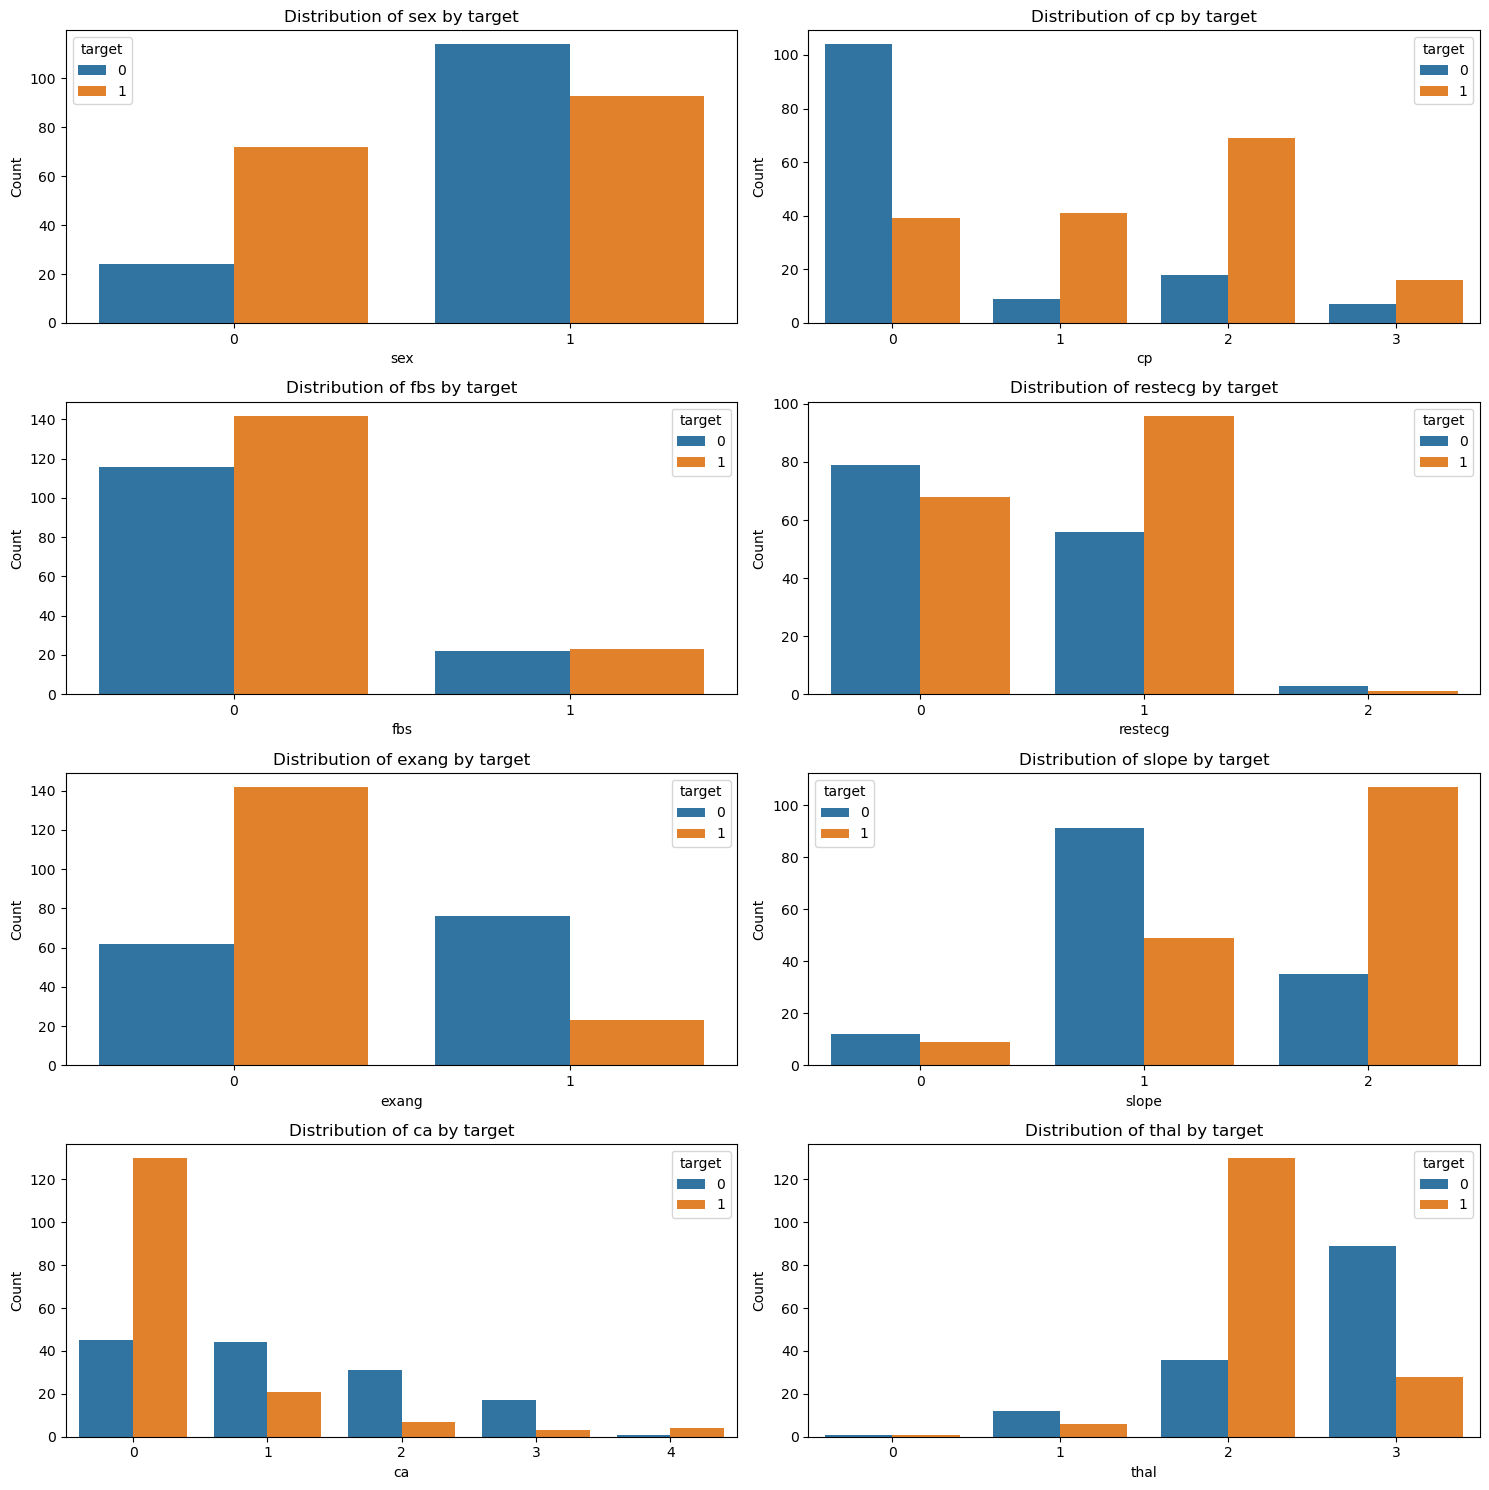

In [51]:
#setting up the matplotlib figure
%matplotlib inline
fig, axes=plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()
categorical_vars=['sex','cp','fbs','restecg','exang','slope','ca','thal']
# Plot countplots for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by target')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

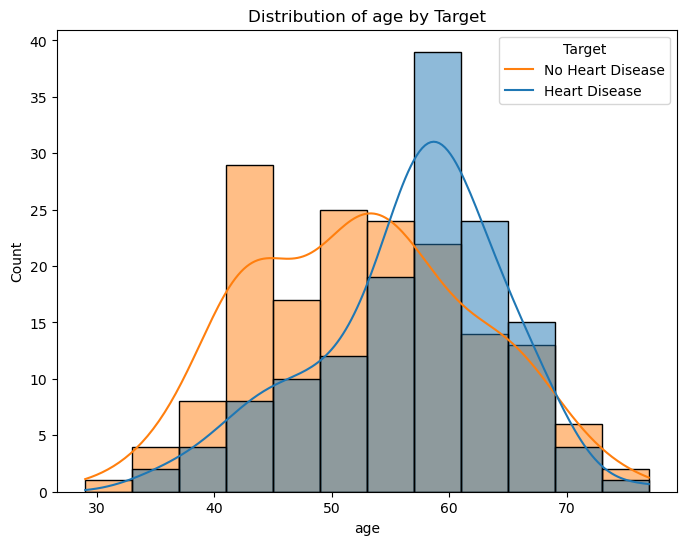

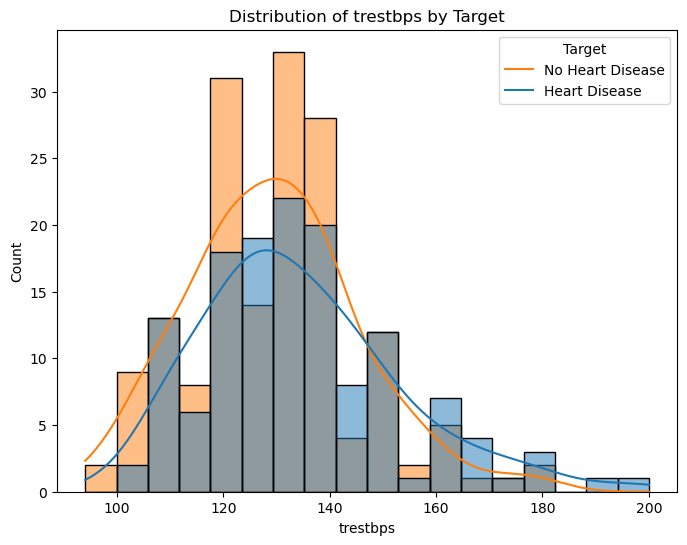

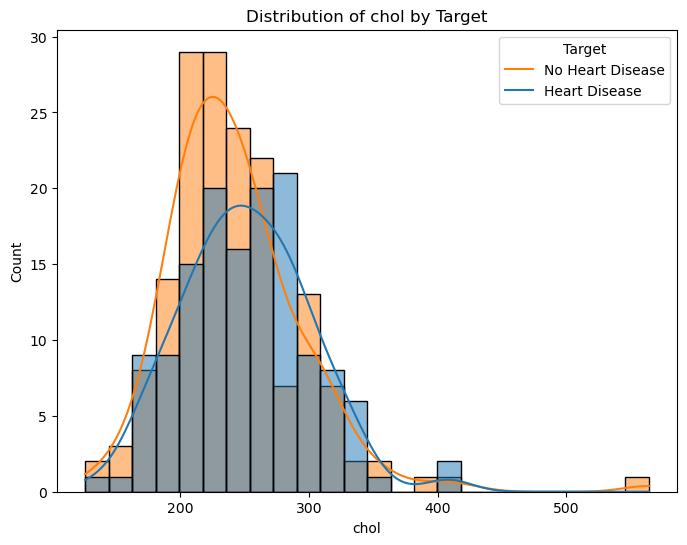

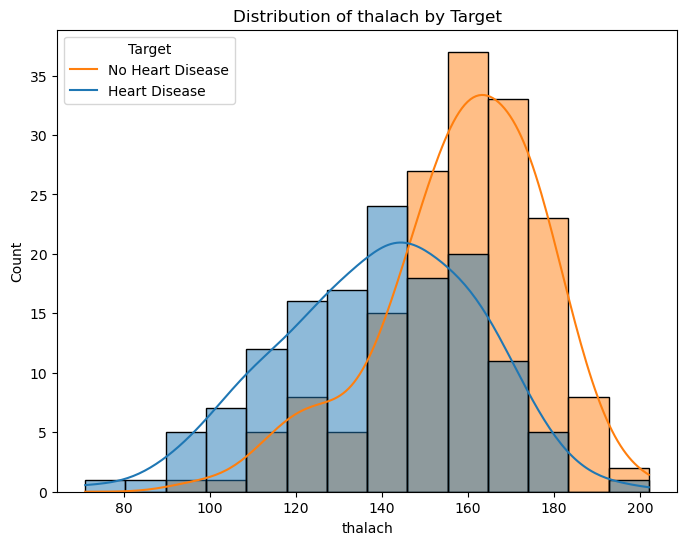

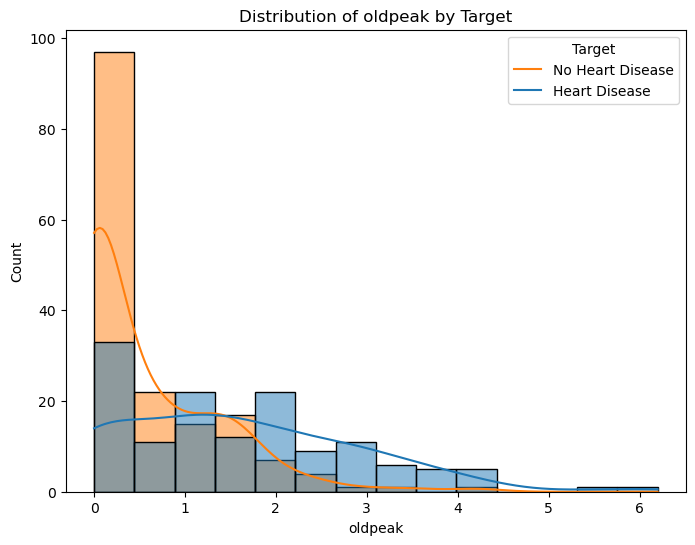

In [52]:
# Plot histograms for numeric variables based on the target variable
numeric_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, hue='target', kde=True)
    plt.title(f'Distribution of {var} by Target')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
    plt.show()

In [53]:
#Data Processing
cate_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
cont_val =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [54]:
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [55]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [56]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [59]:
st=  StandardScaler()
df[cont_val]= st.fit_transform(df[cont_val])

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [61]:
#Splitting The dataset into Training Set and Test Set
X = df.drop('target',axis=1)# dependent variable
y = df['target']

In [29]:
y

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [68]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,0.290464,1,0,1.049520,0.574662,0,0,-1.646316,1,-0.379244,1,1,1
228,0.511041,1,3,2.191778,0.806568,0,0,0.409017,0,-0.724323,1,0,3
111,0.290464,1,2,1.049520,-2.324160,1,1,1.021244,0,-0.724323,2,1,3
246,0.180175,0,0,0.135714,3.144951,0,0,0.015443,1,0.742260,1,2,3
60,1.834507,0,2,-1.234996,0.362082,1,0,-0.859167,0,-0.896862,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1.613930,1,2,0.478391,0.149501,0,0,-0.159479,0,0.828529,1,3,3
104,-0.481558,1,2,-0.149851,-0.971377,0,1,0.583939,0,-0.896862,2,0,2
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3
193,0.621330,1,0,0.763956,0.690615,0,0,-0.334401,1,1.518686,1,2,3


In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [69]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred1)

0.8524590163934426

In [72]:
from sklearn import svm

In [73]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [76]:
final_data = pd.DataFrame({'Models': ['LR','SVM','RFC'],
                           'ACC': [accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3)]})

In [77]:
final_data

,Models,ACC
0,LR,0.852459
1,SVM,0.868852
2,RFC,0.868852


In [78]:
X = df.drop('target',axis=1)# dependent variable
y = df['target']


In [79]:
X.shape

(303, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X,y)

In [88]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.8,
    'slope': 2,
    'ca': 2,
    'thal':3,
},index=[0])

In [89]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.8,2,2,3


In [91]:
p=rf.predict(new_data)
if p[0]==0:
    print("Patient is safe, No heart disease.")
else:
    print("Patient is Likely to develop a heart disease!")

Patient is safe, No heart disease.


In [92]:
import joblib

In [93]:
joblib.dump(rf,'random_forest_model.joblib')

['random_forest_model.joblib']

In [94]:
model=joblib.load('random_forest_model.joblib')

In [95]:
model.predict(new_data)

array([0], dtype=int64)